### Machine Learning Programming-PROG8245 

Name - Kumari Nikitha Singh 

Student Id- 9053016

# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

### Import Packages

In [35]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_diabetes



### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [36]:

# Using the actual path to CSV file for the dataset
file_path = 'CSVs/pew-raw.csv'  
df_pew = pd.read_csv(file_path)

# print the first 5 rows for verification
print(df_pew.head())


            religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  $50-75k
0           Agnostic      27        34       60       81        76      137
1            Atheist      12        27       37       52        35       70
2           Buddhist      27        21       30       34        33       58
3           Catholic     418       617      732      670       638     1116
4  Dont know/refused      15        14       15       11        10       35


2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [37]:

# View the first 5 rows of the DataFrame
print("Head (first 5 rows):")
print(df_pew.head())

#  View the last 5 rows of the DataFrame
print("\nTail (last 5 rows):")
print(df_pew.tail())

# Use iloc to get specific rows by index position 
print("\nUsing iloc (rows 0 to 2):")
print(df_pew.iloc[0:3])

#  Use loc to access rows by label 
print("\nUsing loc (rows 0 to 2):")
print(df_pew.loc[0:2])

# print a specific cell using iloc
print("\nSpecific cell using iloc (row 0, col 1):")
print(df_pew.iloc[0, 1])

#  print a specific cell using loc
print("\nAccess a column using loc:")
print(df_pew.loc[:, 'religion'])


Head (first 5 rows):
            religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  $50-75k
0           Agnostic      27        34       60       81        76      137
1            Atheist      12        27       37       52        35       70
2           Buddhist      27        21       30       34        33       58
3           Catholic     418       617      732      670       638     1116
4  Dont know/refused      15        14       15       11        10       35

Tail (last 5 rows):
                   religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  \
5         Evangelical Prot      575       869     1064      982       881   
6                    Hindu        1         9        7        9        11   
7  Historically Black Prot      228       244      236      238       197   
8         Jehovahs Witness       20        27       24       24        21   
9                   Jewish       19        19       25       25        30   

   $50-75k  
5     1486  
6       34  


***What does not seem right in the above dataframe?***

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [38]:
# Using the function melt to reshape the DataFrame
df_melted_pew = pd.melt(df_pew, id_vars=['religion'], var_name='income', value_name='count')

# Output of the reshaped dataset 
df_melted_pew.head(10)


,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovahs Witness,<$10k,20
9,Jewish,<$10k,19


### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [39]:
# give the path to your Billboard CSV file
file_path = 'CSVs/billboard.csv'  
df_billboard = pd.read_csv(file_path, encoding='unicode_escape')

# Print the first few rows of the DataFrame
print(df_billboard.head())


   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week  ...  \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0  ...   
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0  ...   
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0  ...   
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0  ...   
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0  ...   

   x67th.week  x68th.week  x69th.week  x70th.week  x71st.week  x72nd.week  \
0         NaN  

2. Observe the first few rows of the dataset.

In [40]:

# observe the first 5 rows of the dataset
print(df_billboard.head())


   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week  ...  \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0  ...   
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0  ...   
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0  ...   
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0  ...   
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0  ...   

   x67th.week  x68th.week  x69th.week  x70th.week  x71st.week  x72nd.week  \
0         NaN  

***What is wrong with the above dataset?***

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [41]:
# Using the melt function to reshape the DataFrame for Billboard data
df_melted_billboard = pd.melt(
    df_billboard,
    id_vars=['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked'],
    var_name='week',
    value_name='rank'
) 

# Drop rows with missing rank values (NaN)
df_melted_billboard = df_melted_billboard.dropna(subset=['rank'])

# print the reshaped dataset
print(df_melted_billboard.head(1000))


      year      artist.inverted                                  track  time  \
0     2000      Destiny's Child               Independent Women Part I  3:38   
1     2000              Santana                           Maria, Maria  4:18   
2     2000        Savage Garden                     I Knew I Loved You  4:07   
3     2000              Madonna                                  Music  3:45   
4     2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   
...    ...                  ...                                    ...   ...   
1010  2000               Filter                         Take A Picture  4:23   
1011  2000        Martin, Ricky                              She Bangs  4:02   
1012  2000             Mystikal                           Shake Ya Ass  4:46   
1013  2000                BBMak                              Back Here  3:35   
1014  2000      Spears, Britney     From The Bottom Of My Broken Heart  4:30   

      genre date.entered date.peaked   

If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [42]:
# Clean the 'week' column from 'week.1', 'week.2', etc. to just the week number
df_melted_billboard['week'] = df_melted_billboard['week'].astype(str).str.extract(r'(\d+)').astype(int)

# Print the first few cleaned rows
print(df_melted_billboard.head(1000))


      year      artist.inverted                                  track  time  \
0     2000      Destiny's Child               Independent Women Part I  3:38   
1     2000              Santana                           Maria, Maria  4:18   
2     2000        Savage Garden                     I Knew I Loved You  4:07   
3     2000              Madonna                                  Music  3:45   
4     2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   
...    ...                  ...                                    ...   ...   
1010  2000               Filter                         Take A Picture  4:23   
1011  2000        Martin, Ricky                              She Bangs  4:02   
1012  2000             Mystikal                           Shake Ya Ass  4:46   
1013  2000                BBMak                              Back Here  3:35   
1014  2000      Spears, Britney     From The Bottom Of My Broken Heart  4:30   

      genre date.entered date.peaked  w

5. Now let's inspect the ***Week*** column in the dataframe.

In [43]:
# print the first few values in the 'week' column
print(df_melted_billboard['week'].head())

# print unique values in the 'week' column
print("\nUnique weeks:", df_melted_billboard['week'].unique())
print("\nWeek column stats:")
print(df_melted_billboard['week'].describe())


0    1
1    1
2    1
3    1
4    1
Name: week, dtype: int64

Unique weeks: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]

Week column stats:
count    5307.000000
mean       11.470699
std         9.001300
min         1.000000
25%         5.000000
50%        10.000000
75%        16.000000
max        65.000000
Name: week, dtype: float64


Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



In [44]:
# Ensure both columns are string type before merging
df_melted_billboard['artist.inverted'] = df_melted_billboard['artist.inverted'].astype(str)
df_billboard['artist.inverted'] = df_billboard['artist.inverted'].astype(str)

df_melted_billboard = df_melted_billboard.merge(
    df_billboard[['track', 'artist.inverted', 'date.entered']],
    on=['track', 'artist.inverted'],
    how='left'
)

# Ensure 'date.entered_y' is in datetime format
df_melted_billboard['date.entered_y'] = pd.to_datetime(df_melted_billboard['date.entered_y'], errors='coerce')

# Now safely calculate the date when the rank was recorded
df_melted_billboard['date.ranked'] = df_melted_billboard['date.entered_y'] + pd.to_timedelta(df_melted_billboard['week'] - 1, unit='W')

# Show sample output
print(df_melted_billboard.head(1000))



     year      artist.inverted                                  track  time  \
0    2000      Destiny's Child               Independent Women Part I  3:38   
1    2000              Santana                           Maria, Maria  4:18   
2    2000        Savage Garden                     I Knew I Loved You  4:07   
3    2000              Madonna                                  Music  3:45   
4    2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   
..    ...                  ...                                    ...   ...   
995  2000               Filter                         Take A Picture  4:23   
996  2000        Martin, Ricky                              She Bangs  4:02   
997  2000             Mystikal                           Shake Ya Ass  4:46   
998  2000                BBMak                              Back Here  3:35   
999  2000      Spears, Britney     From The Bottom Of My Broken Heart  4:30   

     genre date.entered_x date.peaked  week  rank d

*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

7. Let's only keep necessary columns

In [45]:
# Keep only the necessary columns
df_melted_billboard= df_melted_billboard[['track', 'artist.inverted', 'rank', 'week', 'date.ranked']]

# Display the cleaned dataframe
print(df_melted_billboard.head(1000))


                                     track      artist.inverted  rank  week  \
0                 Independent Women Part I      Destiny's Child  78.0     1   
1                             Maria, Maria              Santana  15.0     1   
2                       I Knew I Loved You        Savage Garden  71.0     1   
3                                    Music              Madonna  41.0     1   
4    Come On Over Baby (All I Want Is You)  Aguilera, Christina  57.0     1   
..                                     ...                  ...   ...   ...   
995                         Take A Picture               Filter  52.0     4   
996                              She Bangs        Martin, Ricky  21.0     4   
997                           Shake Ya Ass             Mystikal  41.0     4   
998                              Back Here                BBMak  52.0     4   
999     From The Bottom Of My Broken Heart      Spears, Britney  52.0     4   

    date.ranked  
0    2000-09-23  
1    2000-02-12

8. How to rename your columns?

In [58]:
# rename the columns as per the requirement
df_melted_billboard = df_melted_billboard.rename(columns={
    'artist.inverted': 'artist',
    'track': 'title',
    'rank': 'position'
})

# print updated column names
print(df_melted_billboard.columns)
print(df_melted_billboard.head(1000))



Index(['title', 'artist', 'position', 'week', 'date.ranked'], dtype='object')
                                     title               artist  position  \
0                 Independent Women Part I      Destiny's Child      78.0   
1                             Maria, Maria              Santana      15.0   
2                       I Knew I Loved You        Savage Garden      71.0   
3                                    Music              Madonna      41.0   
4    Come On Over Baby (All I Want Is You)  Aguilera, Christina      57.0   
..                                     ...                  ...       ...   
995                         Take A Picture               Filter      52.0   
996                              She Bangs        Martin, Ricky      21.0   
997                           Shake Ya Ass             Mystikal      41.0   
998                              Back Here                BBMak      52.0   
999     From The Bottom Of My Broken Heart      Spears, Britney      52.0  

Display the dataframe

In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

In [60]:

# Remove all rows with any remaining NaN values
df_cleaned = df_melted_billboard.dropna()

#Print cleaned data and its structure
print(df_cleaned.head(10))
print("\nShape of cleaned dataset:", df_cleaned.shape)
print("\nMissing values:\n", df_cleaned.isnull().sum())



                                   title               artist  position  week  \
0               Independent Women Part I      Destiny's Child      78.0     1   
1                           Maria, Maria              Santana      15.0     1   
2                     I Knew I Loved You        Savage Garden      71.0     1   
3                                  Music              Madonna      41.0     1   
4  Come On Over Baby (All I Want Is You)  Aguilera, Christina      57.0     1   
5                  Doesn't Really Matter                Janet      59.0     1   
6                            Say My Name      Destiny's Child      83.0     1   
7                            Be With You    Iglesias, Enrique      63.0     1   
8                             Incomplete                Sisqo      77.0     1   
9                                 Amazed             Lonestar      81.0     1   

  date.ranked  
0  2000-09-23  
1  2000-02-12  
2  1999-10-23  
3  2000-08-12  
4  2000-08-05  
5  2000-06-1

## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

First Row seems to be the datatype, we need to remove it

Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

Lets also check dropping the columns

Let's observe how many columns we lost

### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

Now let's see what is the mean of the MPG column

We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [62]:
# Load the dataset (skip the first metadata row and use ';' as separator)
cars = pd.read_csv("CSVs/cars.csv", skiprows=[1],sep=";")

# Print the first few rows from the dataset
print("Initial dataset preview:")
print(cars.head())

# Check for missing values and print the count of missing values per column
print("\nMissing values per column:")
print(cars.isna().sum())

# Convert relevant columns to numeric
cars["MPG"] = pd.to_numeric(cars["MPG"], errors="coerce")
cars["Horsepower"] = pd.to_numeric(cars["Horsepower"], errors="coerce")
cars["Displacement"] = pd.to_numeric(cars["Displacement"], errors="coerce")
cars["Weight"] = pd.to_numeric(cars["Weight"], errors="coerce")

# Handle missing data for numeric columns
cars["MPG"].fillna(cars["MPG"].median(), inplace=True)
cars["Horsepower"].fillna(cars["Horsepower"].median(), inplace=True)
cars["Displacement"].fillna(cars["Displacement"].median(), inplace=True)
cars["Weight"].fillna(cars["Weight"].median(), inplace=True)

# Remove any rows still containing NaN
cars.dropna(inplace=True)

# Remove duplicate entries and print the count of duplicates before and after
cars_cleaned = cars.drop_duplicates()
 # Final print of the cleaned dataset
print("\nCleaned dataset info:")
print(cars_cleaned.info())

#  Print the first few rows of the cleaned dataset
print("\nCleaned data sample:")
print(cars_cleaned.head())

Initial dataset preview:
                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu   NaN          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0         NaN   
2         Plymouth Satellite   NaN          8         318.0       150.0   
3              AMC Rebel SST  16.0          8           NaN       150.0   
4                Ford Torino  17.0          8         302.0       140.0   

   Weight  Acceleration  Model Origin  
0  3504.0          12.0     70     US  
1  3693.0          11.5     70     US  
2  3436.0          11.0     70     US  
3     NaN          12.0     70     US  
4  3449.0          10.5     70     US  

Missing values per column:
Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entr

C:\Users\singh\AppData\Local\Temp\ipykernel_15548\930048594.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars["MPG"].fillna(cars["MPG"].median(), inplace=True)
C:\Users\singh\AppData\Local\Temp\ipykernel_15548\930048594.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [63]:
# Load and skip data type row 
cars = pd.read_csv("CSVs/cars.csv", sep=";", skiprows=[1])

# Columns to convert from string to numeric
numeric_cols = ["MPG", "Displacement", "Horsepower", "Weight", "Acceleration"]

# Convert to numeric for specified columns, coercing errors to NaN
for col in numeric_cols:
    cars[col] = pd.to_numeric(cars[col], errors="coerce")

# Impute using median as the strategy for numeric columns
imputer = SimpleImputer(strategy="median")
cars[numeric_cols] = imputer.fit_transform(cars[numeric_cols])

# Remove remaining NaNs and duplicates
cars.dropna(inplace=True)
cars_cleaned = cars.drop_duplicates().reset_index(drop=True)

print("\nCleaned Cars Dataset:")
print(cars_cleaned.head())


Cleaned Cars Dataset:
                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  22.5          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0        92.5   
2         Plymouth Satellite  22.5          8         318.0       150.0   
3              AMC Rebel SST  16.0          8         151.0       150.0   
4                Ford Torino  17.0          8         302.0       140.0   

   Weight  Acceleration  Model Origin  
0  3504.0          12.0     70     US  
1  3693.0          11.5     70     US  
2  3436.0          11.0     70     US  
3  2815.0          12.0     70     US  
4  3449.0          10.5     70     US  


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [65]:
# Load dataset and print the first few rows
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

print("\nInitial Diabetes Dataset:")
print(df.head())


Initial Diabetes Dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

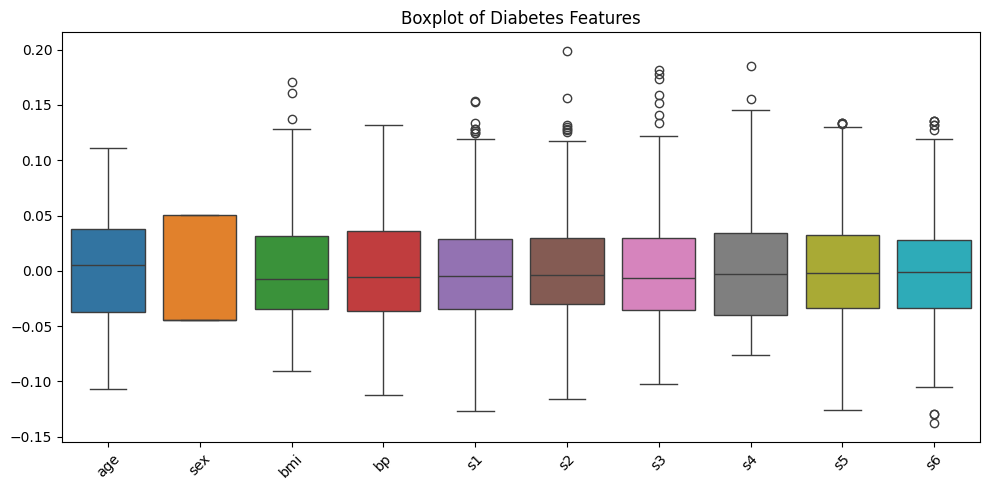

In [66]:
# Boxplot visualization for the diabetes dataset
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title("Boxplot of Diabetes Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

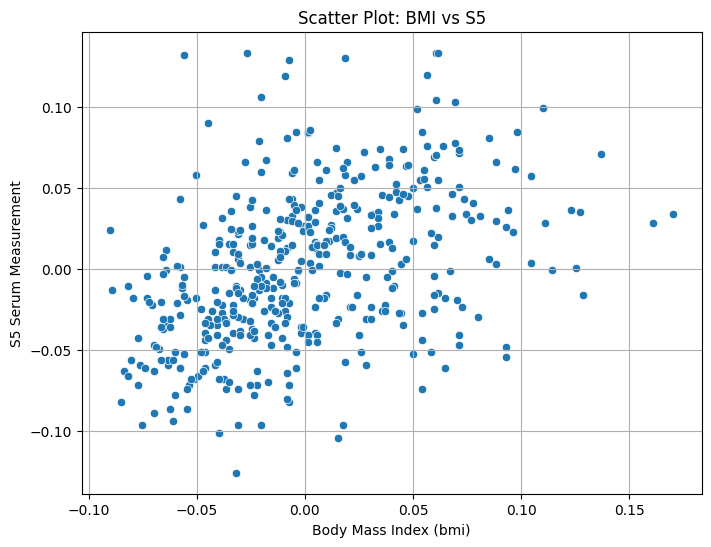

In [52]:

# Scatterplot: BMI vs S5
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='s5')
plt.title("Scatter Plot: BMI vs S5")
plt.xlabel("Body Mass Index (bmi)")
plt.ylabel("S5 Serum Measurement")
plt.grid(True)
plt.show()

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [67]:
# Z-score method for outlier detection
z_scores = stats.zscore(df)
abs_z_scores = abs(z_scores)
filtered_z = (abs_z_scores < 3).all(axis=1)
df_zscore_clean = df[filtered_z]
print("\nShape after Z-score filtering:", df_zscore_clean.shape)
# print the summary after Z-score cleaning 
print("\nSummary after Z-score cleaning:")
print(df_zscore_clean.describe())


Shape after Z-score filtering: (430, 10)

Summary after Z-score cleaning:
              age         sex         bmi          bp          s1          s2  \
count  430.000000  430.000000  430.000000  430.000000  430.000000  430.000000   
mean    -0.000049    0.000137   -0.000932    0.000094   -0.001534   -0.000927   
std      0.047963    0.047629    0.046149    0.047400    0.046511    0.046147   
min     -0.107226   -0.044642   -0.090275   -0.112399   -0.126781   -0.115613   
25%     -0.037299   -0.044642   -0.034229   -0.033213   -0.034592   -0.030358   
50%      0.005383   -0.044642   -0.007284   -0.005670   -0.004321   -0.003819   
75%      0.038076    0.050680    0.030440    0.035360    0.025950    0.028200   
max      0.110727    0.050680    0.137143    0.132044    0.133274    0.131461   

               s3          s4          s5          s6  
count  430.000000  430.000000  430.000000  430.000000  
mean    -0.001143   -0.000991   -0.000646   -0.000654  
std      0.044069    0.0449

Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [54]:
# IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [55]:
filtered_iqr = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df_iqr_clean = df[filtered_iqr]
print("\nShape after IQR filtering:", df_iqr_clean.shape)


Shape after IQR filtering: (411, 10)


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [56]:
# Remove outliers using the Z-score mask
df_cleaned = df[filtered_z].reset_index(drop=True)
print(f"New dataset shape after removing outliers: {df_cleaned.shape}")

New dataset shape after removing outliers: (430, 10)
